# DBSCAN

### Density Based Spatial Clustering of Applications with Noise

- **Core Point:** Point that has more than a specific number of points (MinPts) within a specific radius (Eps).  In other words, there has to be a minimum number of points within a distance to be considered as a core point. 


- **Border Point:** Point that has fewer than MinPts within Eps but is in the neighborhood of a core point.  


- **Noise Point:** Any point that is not a core point or a border point


- DBSCAN is resistant to noise and is handles clusters of different shapes and sizes. On the other hand, when we have varying densities, or have a high dimensional feature space, DBSCAN does not work as well. Also, determining Eps and MinPts can also be difficult to determine. 


- One approach to determine a value for Eps is to calculate the $K^{th}$ nearest neighbor for a ll point in the data set. Save the distance of the farthest neighbor. Next, plot the sorted distances of every point to its $K^{th}$ nearest neighbor. Where we observe the bend in the plot of nearest neighbor distance vs sorted distance will be the value for eps. The minumum number of point set to 4 emperically works the best. 


<img src = "../sources/dbscan.png">

**DBSCAN Pseudo Code**

- current_cluster_label <-- 1
- for all core points do
    - if the core point has no cluster label then
        - current_cluster_label <-- current_cluster_label + 1
        - label the current core point with cluster label current_cluster_label
    - end if
    - for all points in the Eps-neighborhood, excpet ith the point itself do
        - if the point does not have a cluster label then
            - label the point with cluster label current_cluster_label
        - end if
    - end for
- end for




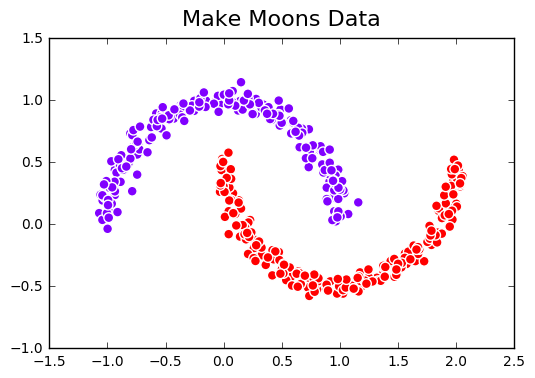

In [69]:
def get_moons(n,std):  
    moons = make_moons(n_samples=n,noise=std,random_state=1)
    return(moons) 

d,l = get_moons(400,0.05)
plt.scatter(d[:,0],d[:,1],c=l,cmap='rainbow',edgecolor='w',s=50)
plt.title('Make Moons Data',fontsize=16,y=1.02)

In [70]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import homogeneity_score,silhouette_samples
from matplotlib import cm

Estimated Number of Clusters:  11
Homogeneity Score:  0.700541236287
Silhouette Score:  0.20817320335


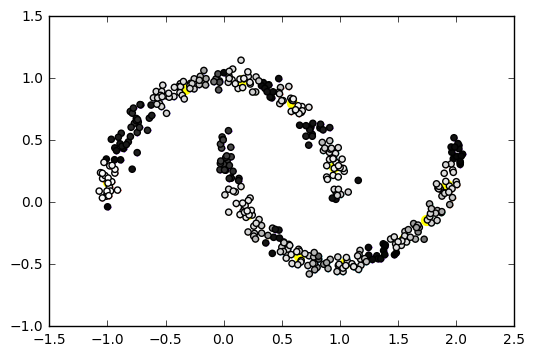

In [73]:
def get_DBSCAN(X,y_true,eps,min_samples):
    
    model = DBSCAN(eps=eps,min_samples=min_samples).fit(X)
    label = model.labels_
    
    #Compute number of clusters
    n_clusters = len(set(label)) - (1 if -1 in label else 0)
    
    print('Estimated Number of Clusters: ',n_clusters)
    print('Homogeneity Score: ',homogeneity_score(y_true,label))
    print('Silhouette Score: ',silhouette_score(X,label))
    
    silhouette_per_sample = silhouette_samples(X,label)
    
    centroid = []
    #Centroid of Each Cluster
    for l in range(0,n_clusters):
        centroid.append([np.mean(X[np.where(label == l),0]), np.mean(X[np.where(label == l),1])])

    centroid = np.array(centroid)

    plt.scatter(centroid[:,0],centroid[:,1],color='yellow',s=50)
    plt.scatter(X[:,0],X[:,1],c=label,cmap='rainbow',marker='+')
    plt.scatter(X[:,0],X[:,1],c=silhouette_per_sample,cmap=plt.cm.gray)

dbscan = get_DBSCAN(d,l,0.15,20)